# ARIMA Time Series Forecasting

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## EDA and Preprocessing

In [51]:
# Load the data
data=pd.read_csv('New motor vehicle sales data.csv', parse_dates = True, index_col = 'REF_DATE')

# Display the shape of the data
data.shape

(160918, 18)

In [52]:
# Display the first few rows of the data
data.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


### Checked missing value

since no missing value in the main columns we need "REF_DATE" and "Value", no need to drop any missing value.

Comment from Kelechi: The Value column has some null data for some provinces! We will explore if necessary to fill the nulls.

In [53]:
# check for missing values
data.isnull().sum()

REF_DATE                      0
GEO                           0
DGUID                     14362
Vehicle type                  0
Origin of manufacture         0
Sales                         0
Seasonal adjustment           0
UOM                           0
UOM_ID                        0
SCALAR_FACTOR                 0
SCALAR_ID                     0
VECTOR                        0
COORDINATE                    0
VALUE                     18441
STATUS                   142477
SYMBOL                   160918
TERMINATED               155134
DECIMALS                      0
dtype: int64

### Check duplicates

In [54]:
# Check for duplicates
data.duplicated().sum()

0

### Deal with aggregated data

We found that in the dataset, there is aggregated 
1. GEO: national data and provincial data.
2. Vehicle type: Passenger, Truck, and Total New
3. Origin of manufacture: "Japen", "North America", "Other Countries", "Total, country of manufacture", "Total, overseas"


In [55]:
# Display the unique value within each columns
data.nunique()

REF_DATE                   929
GEO                         11
DGUID                       10
Vehicle type                 3
Origin of manufacture        5
Sales                        2
Seasonal adjustment          2
UOM                          2
UOM_ID                       2
SCALAR_FACTOR                2
SCALAR_ID                    2
VECTOR                     257
COORDINATE                 257
VALUE                    63879
STATUS                       1
SYMBOL                       0
TERMINATED                   1
DECIMALS                     1
dtype: int64

#### Deal with aggregated GEO

In [56]:
# Display the  unique values in the 'GEO' column
data['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia and the Territories'],
      dtype=object)

In [57]:
# Split the data with 'GEO="Canada"'
data_canada=data[data['GEO']=='Canada']

# Display the shape of the data
data_canada.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


In [58]:
# Display the shape of the data
data_canada.shape

(19650, 18)

In [59]:
#Split for provincial data 'GEO' not equal to "Canada"
data_provincial=data[data['GEO']!='Canada']

#Display the unique values in the 'GEO' column to confirm that the rows with 'GEO="Canada" have been removed
data_provincial['GEO'].unique()

#Display the shape of the data
data_provincial.shape

(141268, 18)

In [60]:
# Display the first few rows of the data
data_provincial.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
19650,1968-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,754.0,NaN,NaN,NaN,0
19651,1968-02,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,895.0,NaN,NaN,NaN,0
19652,1968-03,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1569.0,NaN,NaN,NaN,0
19653,1968-04,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1390.0,NaN,NaN,NaN,0
19654,1968-05,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1567.0,NaN,NaN,NaN,0


### Plot

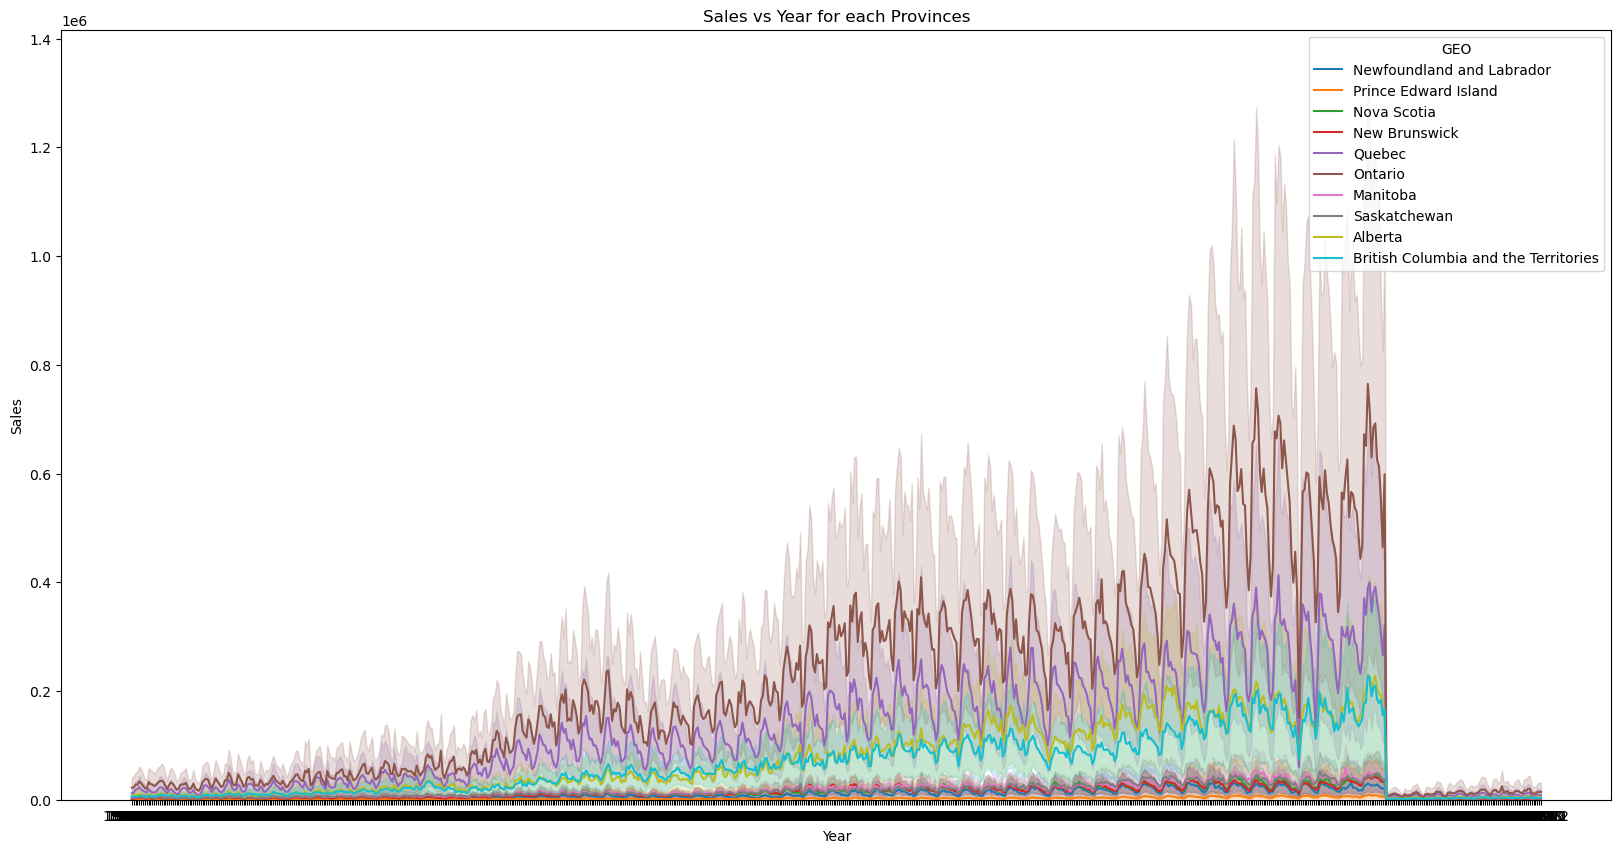

In [61]:
# Plot the "REF_DATE" and "Value" pair for each "GEO"


# Adjust figure size
plt.figure(figsize=(20, 10))

# Plot the lineplot
sns.lineplot(data=data_provincial, x='REF_DATE', y='VALUE', hue='GEO')

# Add more space for y-axis labels
plt.ylim(bottom=0)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales vs Year for each Provinces')

# Show the plot
plt.show()

/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_12277/3170920416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_canada['REF_DATE'] = pd.to_datetime(data_canada['REF_DATE']).dt.strftime('%y')


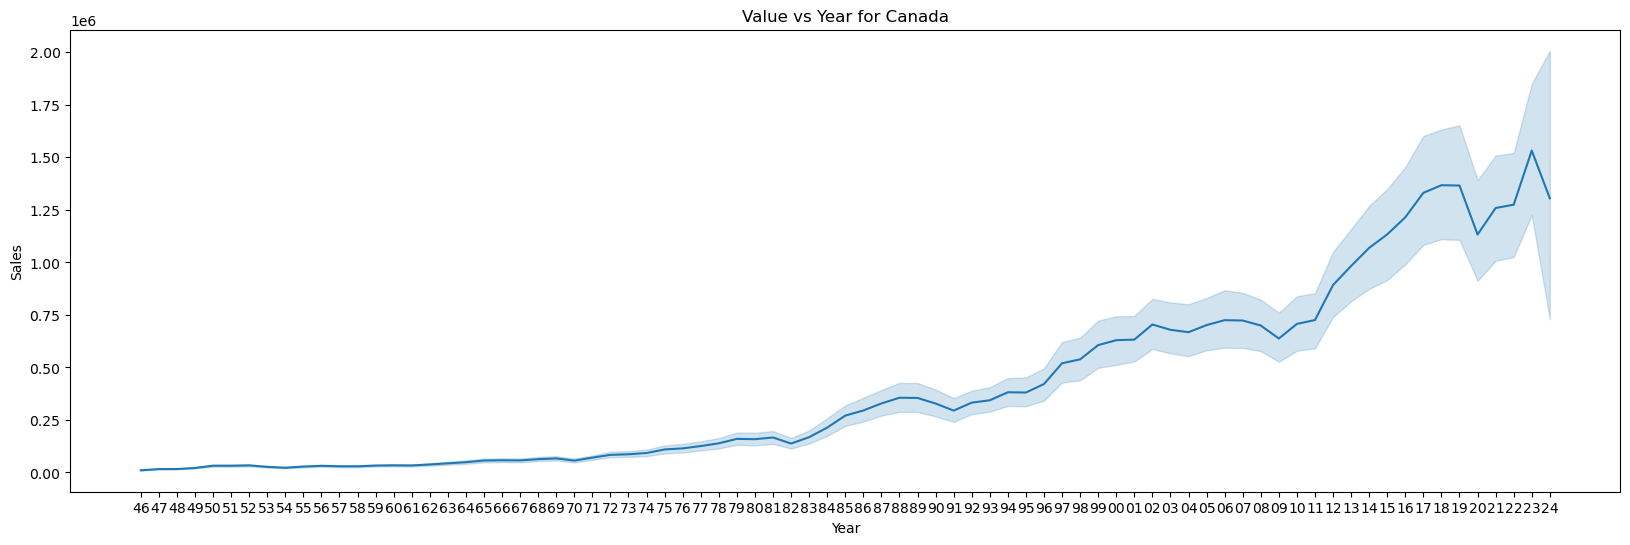

In [62]:
# Adjust figure size
plt.figure(figsize=(20, 6))

# Format the date column to display only the last 2 digits of the year
#data_canada['REF_DATE'] = pd.to_datetime(data_canada['REF_DATE']).dt.strftime('%y') Omitting this line

# Plot the lineplot
sns.lineplot(data=data_canada, x='REF_DATE', y='VALUE')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Value vs Year for Canada')
plt.show()

